# Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
df = pd.read_csv("loans.csv")

In [3]:
df.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


# Check Dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   client_id    443 non-null    int64  
 1   loan_type    443 non-null    object 
 2   loan_amount  443 non-null    int64  
 3   repaid       443 non-null    int64  
 4   loan_id      443 non-null    int64  
 5   loan_start   443 non-null    object 
 6   loan_end     443 non-null    object 
 7   rate         443 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 27.8+ KB


In [5]:
df.shape

(443, 8)


این دیتاست شامل 443 سطر و 8 ستون می باشد که دارای نوع داده ایی زیر هستند :  


1- float : `rate`  
2- int: `cliend_id`, `loan_amount`, `repaid`, `loan_id`  
3- object: `loan_start`, `loan_end`, `loan_type` 
_________

In [6]:
# بررسی خلاصه ی آماری دیتاست
df.describe().T

,count,mean,std,min,25%,50%,75%,max
client_id,443.0,38911.060948,7768.681063,25707.00,32885.00,39505.00,46109.00,49624.00
loan_amount,443.0,7982.311512,4172.891992,559.00,4232.50,8320.00,11739.00,14971.00
repaid,443.0,0.534989,0.499338,0.00,0.00,1.00,1.00,1.00
loan_id,443.0,11017.101580,581.826222,10009.00,10507.50,11033.00,11526.00,11991.00
rate,443.0,3.217156,2.397168,0.01,1.22,2.78,4.75,12.62


با توجه جدول آماری بالا , میتوان استنباط کرد که :  

1- `rate` : دارای چولگی راست می باشد  
2- `loan_amount`: تقریبا دارای چولگی متقارن می باشد

In [7]:
# بررسی مقادیر Nan
df.isnull().sum()

client_id      0
loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64

In [8]:
# بررسی مقادیر گمشده در سطر و ستون
df.isnull().any()

client_id      False
loan_type      False
loan_amount    False
repaid         False
loan_id        False
loan_start     False
loan_end       False
rate           False
dtype: bool

این دیتاست در سطر و ستون دارای مقادیر گم شده نمی باشد.

In [9]:
# بررسی مقادیر تکراری
df.duplicated().sum()

0

**با توجه به دو کد بالا , این دیتافریم دارای مقادیر گم شده و تکراری نمی باشد**

# Statistical Analysis

## `loan_amount`

**نمایش توزیع ستون `loan_amount`**

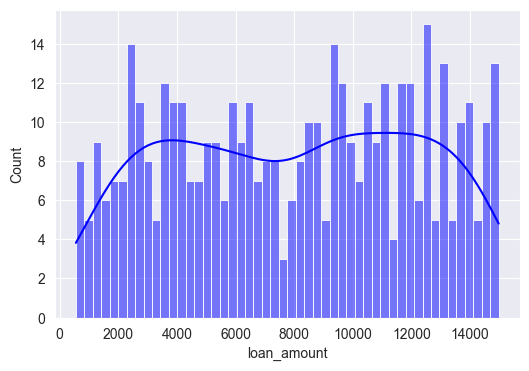

In [10]:
# بررسی توزیع ستون loan_amount
plt.figure(figsize=(6, 4))
sns.set_style('darkgrid')
sns.histplot(df['loan_amount'], bins=50, kde=True, color='blue')
plt.show()

In [11]:
# بررسی چولگی loan_amount
skew = df['loan_amount'].skew()
kurt = df['loan_amount'].kurt()
mean = df['loan_amount'].mean()
median = df['loan_amount'].median()
range = np.ptp(df['loan_amount'])

print(f"Skewness: {skew:.4f}")
print(f"Kurtosis: {kurt:.4f}")
print(f"Mean: {mean:.4f}")
print(f"Median: {median:.4f}")
print(f"Range: {range}")

Skewness: -0.0401
Kurtosis: -1.2321
Mean: 7982.3115
Median: 8320.0000
Range: 14412


## `rate`

**نمایش توزیع ستون `rate`**

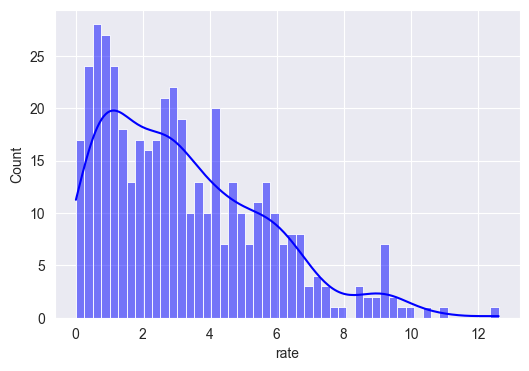

In [12]:
# بررسی توزیع ستون rate
plt.figure(figsize=(6, 4))
sns.set_style('darkgrid')
sns.histplot(df['rate'], bins=50, kde=True, color='blue')
plt.show()

In [13]:
# بررسی چولگی و کورتوسیس ستون rate
skew = df['rate'].skew()
kurt = df['rate'].kurt()
mean = df['rate'].mean()
median = df['rate'].median()
range = np.ptp(df['rate'])

print(f"Skewness: {skew:.4f}")
print(f"Kurtosis: {kurt:.4f}")
print(f"Mean: {mean:.4f}")
print(f"Median: {median:.4f}")
print(f"Range: {range}")

Skewness: 0.8842
Kurtosis: 0.4244
Mean: 3.2172
Median: 2.7800
Range: 12.61


## `client_id` 

In [14]:
#بررسی مقادیر آماری برای ستون client_id
skew = df['client_id'].skew()
kurt = df['client_id'].kurt()
mean = df['client_id'].mean()
median = df['client_id'].median()
range = np.ptp(df['client_id'])

print(f"Skewness: {skew:.4f}")
print(f"Kurtosis: {kurt:.4f}")
print(f"Mean: {mean:.4f}")
print(f"Median: {median:.4f}")
print(f"Range: {range}")

Skewness: -0.2789
Kurtosis: -1.1926
Mean: 38911.0609
Median: 39505.0000
Range: 23917


## `loan_type`

**نمایش نمودار میله ایی ستون `loan_type`**

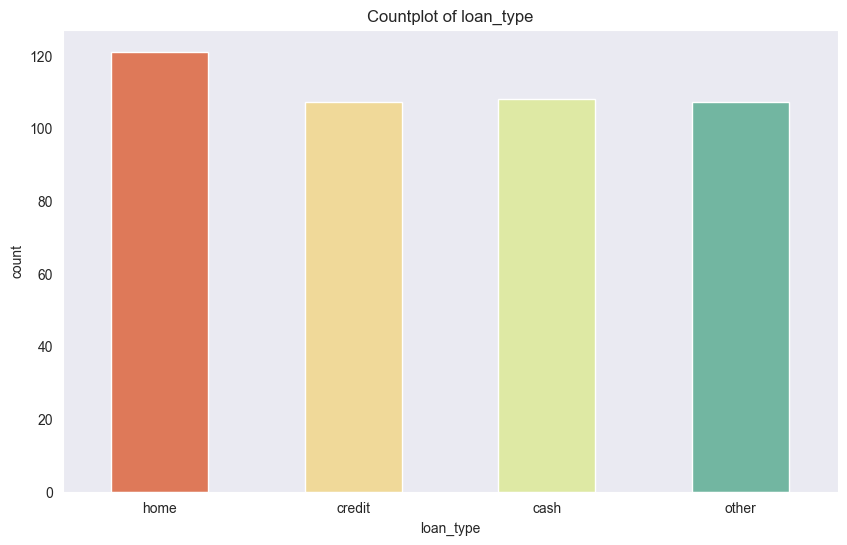

In [15]:
# بررسی مقادیر داده ایی در ستون loan_type
plt.figure(figsize=(10, 6))
sns.set_style('dark')
sns.countplot(data=df, x='loan_type', palette='Spectral', width=0.5)
plt.title("Countplot of loan_type")
plt.show()

## `repaid`

**نمایش نمودار میله ایی ستون `repaid`**

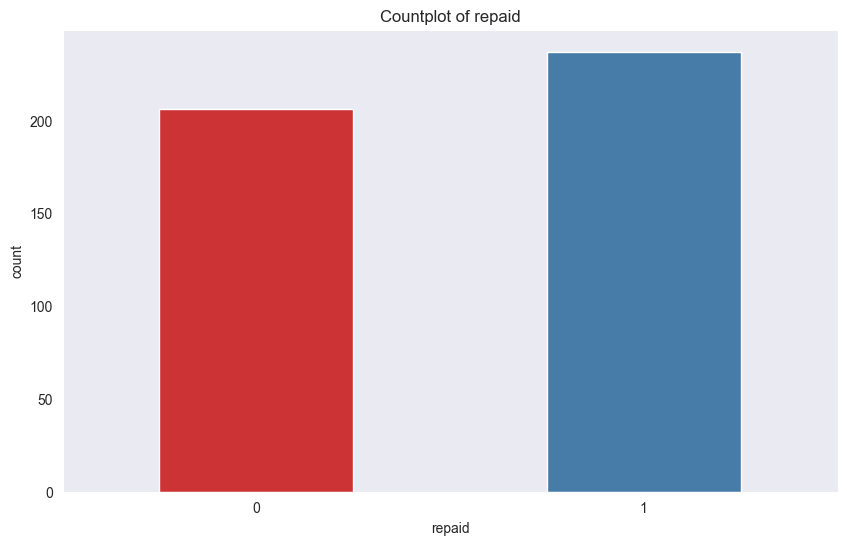

In [16]:
# بررسی مقادیر داده ایی در ستون loan_type
plt.figure(figsize=(10, 6))
sns.set_style('dark')
sns.countplot(data=df, x='repaid', palette='Set1', width=-0.5)
plt.title("Countplot of repaid")
plt.show()

## `rate` Average over time

**بررسی میانگین نرخ بهره در طور زمان**

In [17]:
# با توجه به اینکه این دو ستون دارای تاریخ هسنتد باید توع داده ایی آنها اصلاح شود
df['loan_start'] = pd.to_datetime(df['loan_start'])
df['loan_end'] = pd.to_datetime(df['loan_end'])

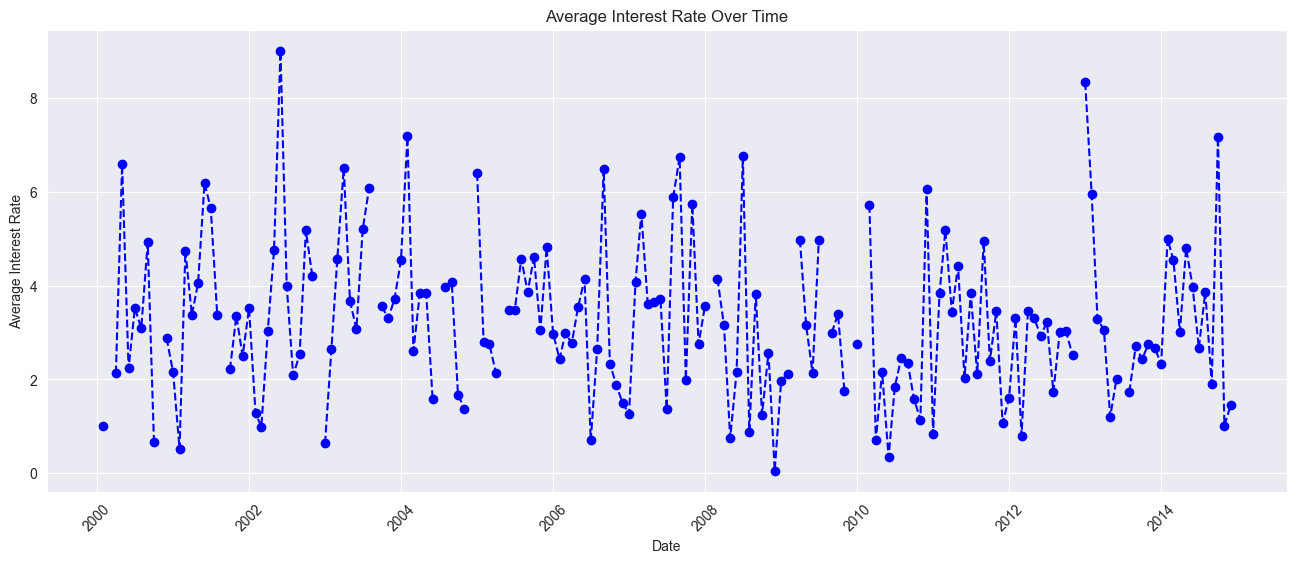

In [26]:
# محاسبه میانگین نرخ بهره برای هر دوره زمانی
interest_rates = df.groupby(pd.Grouper(key='loan_start', freq='M'))['rate'].mean()

plt.figure(figsize=(16, 6))
sns.set_style('darkgrid')
plt.plot(interest_rates.index, interest_rates.values, marker='o', linestyle='--', color='blue')
plt.title('Average Interest Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Average Interest Rate')
plt.xticks(rotation=45)
plt.show()

## Number of loans per month

**نمایش تعداد وام های داده شده در هر ماه از سال**

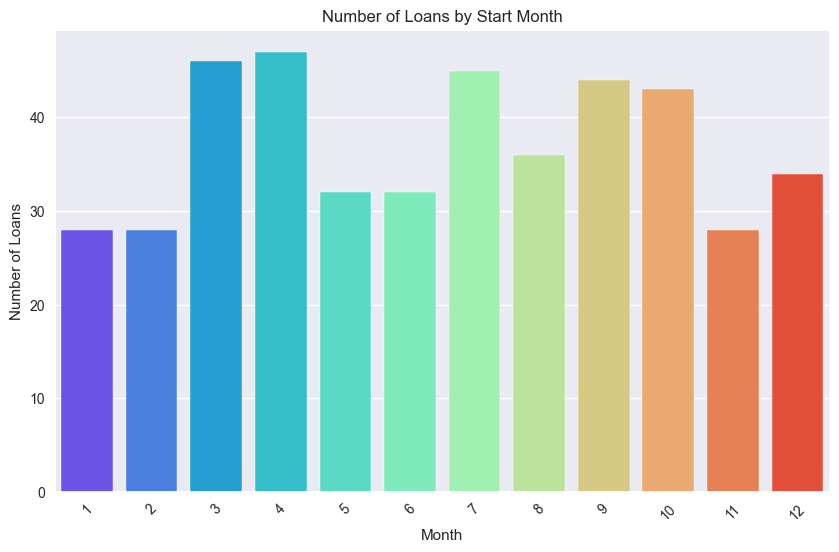

In [291]:
# ایجاد ستون جدید برای نشان دادن ماه شروع وام
df['start_month'] = df['loan_start'].dt.month

# بررسی تعداد وام‌ها بر اساس ماه شروع وام
loan_counts_per_month = df['start_month'].value_counts().sort_index()

# رسم نمودار با استفاده از seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=loan_counts_per_month.index, y=loan_counts_per_month.values, palette="rainbow")
plt.title('Number of Loans by Start Month')
plt.xlabel('Month')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**مشخص کردن تعداد وام ها و مجموع مبلغ و میانگین مبلاغ وام ها  دریافت شده توسط هر مشتری**

In [292]:
df.groupby('client_id')[['loan_amount']].agg(['size', 'sum', 'mean'])

loan_amount                      
                 size     sum          mean
client_id                                  
25707              20  159279   7963.950000
26326              16  116321   7270.062500
26695              18  140845   7824.722222
26945              15  106889   7125.933333
29841              18  176634   9813.000000
32726              19  126032   6633.263158
32885              15  148806   9920.400000
32961              17  133998   7882.235294
35089              20  138784   6939.200000
35214              18  129124   7173.555556
38537              17  152768   8986.352941
39384              19  149444   7865.473684
39505              20  148481   7424.050000
41472              16  120173   7510.812500
41480              20  157897   7894.850000
42320              15  105931   7062.066667
44387              15  110816   7387.733333
44601              20  137385   6869.250000
46109              20  179032   8951.600000
46180              20  154017   7700.850000
46958              13  121919   9378.384615
48177              19  141063   7424.368421
49068              18  137122   7617.888889
49545              20  205786  10289.300000
49624              15  137618   9174.533333

In [293]:
df.groupby(['loan_type', 'repaid'])[['rate']].agg(['mean', 'median', 'count'])

rate             
                      mean median count
loan_type repaid                       
cash      0       2.938200  2.530    50
          1       3.154138  2.765    58
credit    0       3.011304  2.430    46
          1       3.630656  3.430    61
home      0       3.507385  3.140    65
          1       3.101964  2.395    56
other     0       3.508444  2.850    45
          1       2.835323  2.380    62

**مشخص کردن تعداد وام های تسویه شده/تسویه نشده هر مشتری**

In [294]:
df.groupby(['client_id', 'repaid'])[['repaid']].size().to_frame()

0
client_id repaid    
25707     0       12
          1        8
26326     0        8
          1        8
26695     0       11
          1        7
26945     0        9
          1        6
29841     0        8
          1       10
32726     0        8
          1       11
32885     0        7
          1        8
32961     0        8
          1        9
35089     0        8
          1       12
35214     0       10
          1        8
38537     0        7
          1       10
39384     0        7
          1       12
39505     0       11
          1        9
41472     0        8
          1        8
41480     0       10
          1       10
42320     0        6
          1        9
44387     0        6
          1        9
44601     0        5
          1       15
46109     0        9
          1       11
46180     0       10
          1       10
46958     0       10
          1        3
48177     0       11
          1        8
49068     0        5
          1       13
49545     0        6
          1       14
49624     0        6
          1        9

**میانگین مبلغ وام بر اساس نوع وام و وضعیت بازپرداخت**

In [295]:
df.pivot_table(index='loan_type', columns='repaid', values='loan_amount', aggfunc='mean')

repaid,0,1
loan_type,,
cash,7235.400000,8841.620690
credit,7859.086957,7104.819672
home,7937.353846,8092.910714
other,8747.155556,8127.661290


# Preprocessing

## Detect Outliers

### Find Outliers

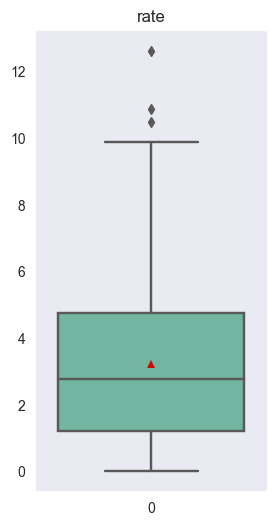

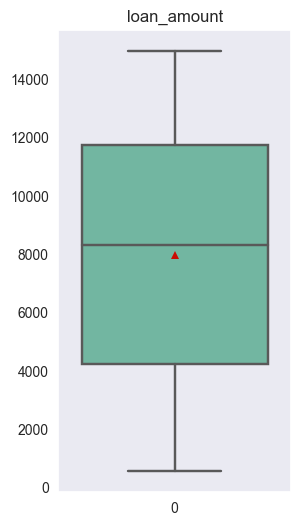

In [296]:
numeric_col = ['rate', 'loan_amount']
for col in numeric_col:
    plt.figure(figsize=(3, 6))
    sns.boxplot(df[col], showmeans=True, palette='Set2')
    plt.title(f"{col}")
    plt.show()

متغییر `rate` دارای مقادیر پرت می باشد

#### Remove Outliers from `rate` Using IQR

In [297]:
#  حذف مقادیر پرت از دیتاست و ستون rate
Q1 = np.quantile(df['rate'], 0.25)
Q3 = np.quantile(df['rate'], 0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['rate'] >= lower_bound) & (df['rate'] <= upper_bound)]

In [298]:
df.reset_index(inplace=True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   client_id    440 non-null    int64         
 1   loan_type    440 non-null    object        
 2   loan_amount  440 non-null    int64         
 3   repaid       440 non-null    int64         
 4   loan_id      440 non-null    int64         
 5   loan_start   440 non-null    datetime64[ns]
 6   loan_end     440 non-null    datetime64[ns]
 7   rate         440 non-null    float64       
 8   start_month  440 non-null    int32         
dtypes: datetime64[ns](2), float64(1), int32(1), int64(4), object(1)
memory usage: 29.3+ KB


## Data Encoding for Categorical Features

### `loan_type`

In [299]:
# بررسی مقدار داده ها در ستون loan_type
df['loan_type'].value_counts()

loan_type
home      120
cash      108
credit    106
other     106
Name: count, dtype: int64

__به دلیل اینکه این ستون از نوع داده ایی ترتیبی نمی باشد از متد get_dummies
برای کدگذاری این متغییر استفاده می کنیم.__

In [300]:
df = pd.get_dummies(df, columns=['loan_type'], dtype='int')

In [301]:
# بررسی مجدد دیتافریم
df.sample(5)

,client_id,loan_amount,repaid,loan_id,loan_start,loan_end,rate,start_month,loan_type_cash,loan_type_credit,loan_type_home,loan_type_other
301,49068,6473,1,11546,2002-09-01,2004-10-23,5.18,9,1,0,0,0
296,49068,2105,0,10075,2001-04-12,2003-12-23,2.91,4,0,0,1,0
349,26695,9808,1,10806,2000-07-27,2003-04-18,1.23,7,0,0,1,0
181,48177,1383,0,11264,2009-08-08,2012-01-03,5.69,8,0,0,0,1
431,26945,3510,0,10196,2002-07-14,2004-08-10,3.19,7,0,1,0,0


## Feature Extraction

In [302]:
# استخراج ویژگی با محاسبه اختلاف بین دو ستون تاریخ شروع وام و پایان وام 
df['loan_duration_days'] = df['loan_end'] - df['loan_start']
df['loan_duration_days'] = (df['loan_duration_days'] / np.timedelta64(1, 'D')).round().astype('int')

In [303]:
df.drop(columns=['loan_start', 'loan_end'], axis=1, inplace=True)

In [304]:
# بررسی مججد دیتافریم
df.sample(5)

,client_id,loan_amount,repaid,loan_id,rate,start_month,loan_type_cash,loan_type_credit,loan_type_home,loan_type_other,loan_duration_days
167,35214,3852,0,11147,2.10,9,0,0,1,0,732
126,32726,5325,1,10858,2.83,4,0,0,0,1,942
276,44601,3376,0,10724,0.29,9,0,0,1,0,784
162,35214,5236,1,11587,0.86,2,0,0,1,0,559
8,46109,11062,1,11611,5.48,9,0,0,1,0,548


## Data Scaling

In [305]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [306]:
# StandardScaler
standard_scaler = StandardScaler()
# for col in df.columns:
#     df[col] = standard_scaler.fit_transform(df[[col]])
for col in ['loan_amount', 'repaid', 'rate', 'loan_duration_days']:
    df[col] = standard_scaler.fit_transform(df[[col]])

## MinMaxScaler
# min_max_scaler = MinMaxScaler()
# for col in df.columns:
#     df[col] = min_max_scaler.fit_transform(df[[col]])

# for col in ['rate', 'client_id', 'loan_id']:
#     df[col] = min_max_scaler.fit_transform(df[[col]])


## RobustScaler
# robust_scaler = RobustScaler()
# for col in df.columns:
#     df[col] = robust_scaler.fit_transform(df[[col]])

In [307]:
df.head()

,client_id,loan_amount,repaid,loan_id,rate,start_month,loan_type_cash,loan_type_credit,loan_type_home,loan_type_other,loan_duration_days
0,46109,1.359338,-1.070673,10243,-0.438905,4,0,0,1,0,-0.985579
1,46109,0.430405,-1.070673,10984,-0.829306,10,0,1,0,0,-0.829105
2,46109,1.134650,0.933992,10990,-1.076560,2,0,0,1,0,-1.654152
3,46109,1.082909,0.933992,10596,-0.833644,12,1,0,0,0,0.906340
4,46109,1.449644,0.933992,11415,-0.013802,7,0,1,0,0,-0.480593


In [308]:
# from sklearn.preprocessing import KBinsDiscretizer
# def k_bins_discretizer(df, cols):
#     dis = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
#     for col in cols:
#         df[col] = dis.fit_transform(df[[col]])
#     return df

In [309]:
# k_bins_discretizer(df, ['loan_amount', 'rate', 'loan_duration_days'])

# Correlation Heatmatp

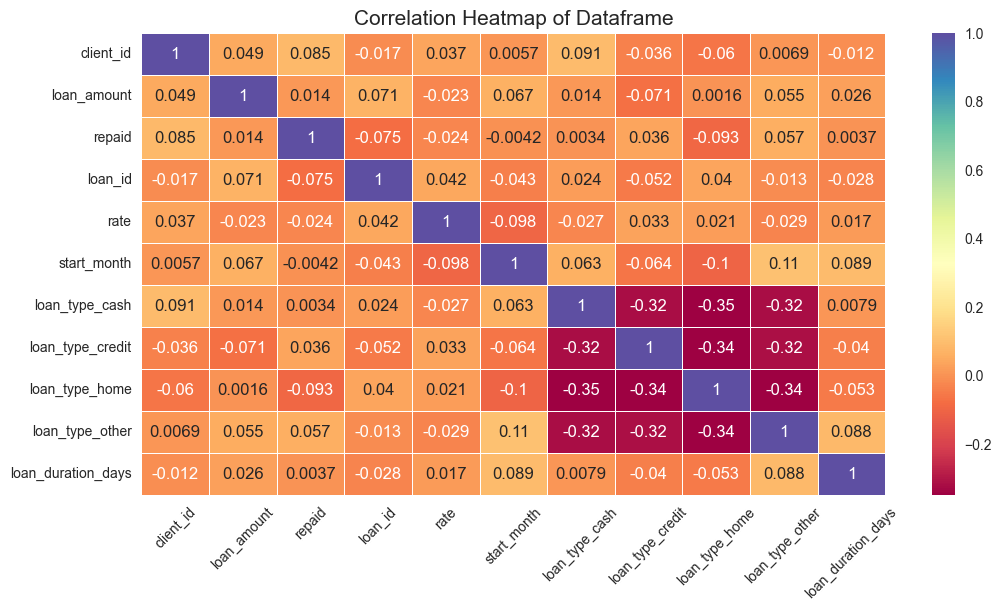

In [310]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidths=0.5, cmap='Spectral')
plt.title("Correlation Heatmap of Dataframe", fontsize=15)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()